## MATH 2071 Lab 8 - Eigenvalues and Eigenvectors

Matthew Ragoza

3/9/2022

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append('code')
import eigen

## Exercise 1 - Rayleigh quotient

The purpose of this exercise is to calculate the Rayleigh quotient for a matrix and vector and to see how it can approximate an eigenvalue for that matrix, given an approximate eigenvector. The Rayleigh quotient is defined as:

$$
    R(A,x) = \frac{x^HAx}{x^Hx}
$$

I implemented this calculation in the function `rayleigh(A, x)` below. I also wrote a function `exercise1(A)` that takes a matrix $A$ as input and performs the recursion $x_{i+1} = A x_i$ starting from $x_0 = [3,2,1]$ for 25 iterations. At each iteration, it computes the Rayleigh quotient and returns this at each step of the loop using a generator.

In [2]:
def rayleigh(A, x):
    '''
    Compute the Rayleigh quotient.
    '''
    return x.conj().T @ A @ x / (x.conj().T @ x)

def exercise1(A, x0=[3,2,1], max_iter=25):
    x = np.array(x0)
    yield 0, rayleigh(A, x)
    for i in range(max_iter):
        x = A @ x
        yield i+1, rayleigh(A, x)

In addition, I wrote a convenience function `get_eigen_problem(k)` that accesses and returns the $k$th matrix, eigenvalues, and eigenvectors from the provided `eigen` module.

In [3]:
def get_eigen_problem(k):
    A = eigen.eigen_matrix(k)
    y = eigen.eigen_values(k)
    V = eigen.eigen_vectors(k)
    return A, y, V

get_eigen_problem(0)

(array([[ 0. , -1. ,  1. ],
        [ 7. ,  5.5, -7. ],
        [ 5. ,  2.5, -4. ]]),
 array([-1.5,  1. ,  2. ]),
 array([[-1.83462559e-16,  7.07106781e-01,  4.47213595e-01],
        [ 7.07106781e-01, -4.57966998e-16, -8.94427191e-01],
        [ 7.07106781e-01,  7.07106781e-01,  1.65502277e-15]]))

I tested my `rayleigh` and `exercise1` functions on the first eigenvalue problem from the provided module. I stored the Rayleigh quotient at each iteration in a list which I plotted below with respect to the iteration. In addition, I computed the distance of the Rayleigh quotient to the nearest eigenvalue of $A$, which I stored and plotted as the error of the method.

<AxesSubplot:xlabel='iteration'>

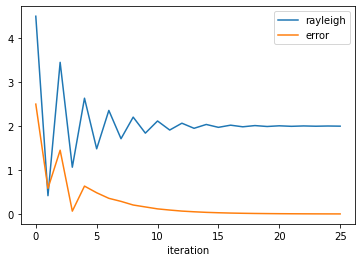

In [4]:
A, y, V = get_eigen_problem(0)

data = []
for i, r in exercise1(A):
    e = np.abs(y - r).min()
    data.append((i, r, e))
        
df = pd.DataFrame(data, columns=['iteration', 'rayleigh', 'error'])
df.plot(x='iteration', y=['rayleigh', 'error'])

We can see from the plot that the Rayleigh quotient converges to an eigenvalue of the matrix.

## Exercise 2 - Power method

The goal of this exercise is to implement the power method of finding the largest eigenvalue and associated eigenvector of a matrix $A$. The method uses the following recursion:

$$
\begin{align}
    x_{i+1} &= \frac{A x_i}{\|A x_i\|}
\end{align}
$$

I implemented a function `power_method1(A, x0, max_iter)` that computes some number of iterations of this recursion using the provided matrix $A$ and initial vector $x_0$. The Rayleigh quotient and vector are yielded at each iteration.

In [5]:
def power_method1(A, x0, max_iter):
    x = np.array(x0)
    yield 0, rayleigh(A, x), x
    for i in range(max_iter):
        x = A @ x
        x = x / np.linalg.norm(x)
        yield i+1, rayleigh(A, x), x

I tested the power method on the first provided eigenvalue problem. At each iteration, I stored the Rayleigh quotient and approximate eigenvector. I also computed the error of the Rayleigh quotient from the largest eigenvalue of $A$ and the error of the output vector from the associated eigenvector of $A$. I displayed these results in a table and plot below.

,iteration,eigenvalue,eigenvector,eigenvalue_error,eigenvector_error
0,0,-4.000000,"[0, 0, 1]",6.000000,1.414214
1,1,0.204545,"[0.1231, -0.8616, -0.4924]",1.795455,0.590385
2,2,2.194030,"[0.5183, -0.6047, 0.6047]",0.194030,0.674289
3,3,0.848893,"[0.2796, -0.9088, -0.3096]",1.151107,0.352335
4,4,2.604937,"[0.5348, -0.7799, 0.3253]",0.604937,0.355837
5,5,1.325438,"[0.3581, -0.9148, -0.187]",0.674562,0.208137
6,6,2.434281,"[0.5058, -0.8447, 0.1749]",0.434281,0.190996
7,7,1.617787,"[0.3985, -0.9105, -0.1104]",0.382213,0.121701
8,8,2.264253,"[0.482, -0.871, 0.095]",0.264253,0.103872
9,9,1.785836,"[0.4202, -0.9052, -0.064]",0.214164,0.070348


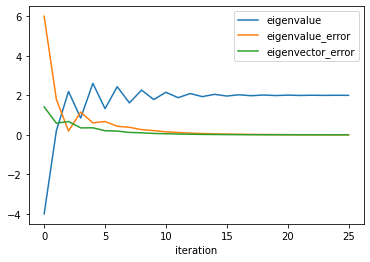

In [7]:
A, y, V = get_eigen_problem(0)

data = []
for i, r, x in power_method1(A, x0=[0,0,1], max_iter=25):
    e_y = np.linalg.norm(y[-1] - r)
    e_V = np.linalg.norm(V[:,-1] - x)
    data.append((i, r, np.round(x, 4), e_y, e_V))
        
df = pd.DataFrame(data, columns=['iteration', 'eigenvalue', 'eigenvector', 'eigenvalue_error', 'eigenvector_error'])
df.plot(x='iteration', y=['eigenvalue', 'eigenvalue_error', 'eigenvector_error'])
df

We can see that this method converges specifically to the largest eigenvalue of $A$ and its associated eigenvector.

## Exercise 3 - Power method stopping criterion

The purpose of this part is to improve the power method implementation with a better stopping criterion that checks whether the method has convergence, both in terms of the relative difference in the Rayleigh quotient and the difference in the vector between each step.

I modified my implemetation into a new `power_method2(A, x0, max_iter, tol)` which now includes a tolerance argument. The method performs up to `max_iter` power iterations, but tests the Rayleigh quotient and approximate eigenvector at each iteration against the tolerance parameter to possibly stop early if the method has converged.

In [8]:
from numpy.linalg import norm

def power_method2(A, x0, max_iter, tol):

    x = np.array(x0)
    r = rayleigh(A, x)
    
    for i in range(max_iter):
        x_prev = x
        r_prev = r

        x = A @ x
        x = x / np.linalg.norm(x)
        r = rayleigh(A, x)
        
        # test for convergence
        if norm(r - r_prev) <= norm(r) * tol and norm(x - x_prev) <= tol:
            break
    
    return i+1, r, x

I experimented with this new stopping criterion by running the power method on 8 different eigenvalue problems with a maximum number of iterations of 100,000 and tolerance of 1e-8. I stored the number of actual iterations performed, the final largest eigenvalue estimate, and the final eigenvector estimate in a table, displayed below.

In [11]:
data = []
for p in range(8):
    A, y, V = get_eigen_problem(p)
    x0 = np.ones(A.shape[0])
    n_iters, r, x = power_method2(A, x0, max_iter=100000, tol=1e-8)
    data.append((n_iters, r, np.round(x, 4)))
    
pd.DataFrame(data, columns=['n_iters', 'eigenvalue', 'eigenvector'])

,n_iters,eigenvalue,eigenvector
0,66,2.000000,"[-0.4472, 0.8944, -0.0]"
1,38,4.732051,"[0.2113, 0.5774, 0.7887]"
2,11,6.274917,"[0.551, 0.6267, 0.551]"
3,38,3.801938,"[0.2319, 0.4179, 0.5211, 0.5211, 0.4179, 0.2319]"
4,100000,0.484848,"[-0.3114, -0.6228, -0.5449, -0.4671]"
5,10,22.392305,"[0.2887, 0.5, 0.5774, 0.5, 0.2887]"
6,1283,3.984841,"[0.0243, -0.0483, 0.0715, -0.0937, 0.1144, -0...."
7,100000,-4.149602,"[0.0687, -0.1476, 0.9867]"


We can see that 6 of the 8 problems converged before the maximum number of iterations, but 2 did not. For problem 7, the eigenvalue is negative, so the direction of the vector changes each iteration. This is not accounted for in the convergence criteria. I extended the criteria to allow for negative eigenvalues below, in `power_method3`.

In [21]:
def power_method2b(A, x0, max_iter, tol):

    x = np.array(x0)
    r = rayleigh(A, x)
    
    for i in range(max_iter):
        x_prev = x
        r_prev = r

        x = A @ x
        x = x / np.linalg.norm(x)
        r = rayleigh(A, x)
        
        # test for convergence
        if norm(r - r_prev) <= norm(r) * tol and (norm(x - x_prev) <= tol or norm(x + x_prev) <= tol):
            break
    
    return i+1, r, x

Then I ran this method on problem 7 again and printed the output below.

In [22]:
A, y, V = get_eigen_problem(7)
x0 = np.ones(A.shape[0])
power_method2b(A, x0, max_iter=100000, tol=1e-8)

(89, -4.149602065592591, array([-0.06866681,  0.14760632, -0.98665964]))

This time, the method converged in 89 iterations.

The other problem that did not converge was problem 4. The absolute values of the eigenvalues of this matrix are all 2, so there is no single largest eigenvalue. This explains why the power method does not converge.

In [14]:
A, y, V = get_eigen_problem(4)
y, np.abs(y)

(array([-2.+0.j        ,  1.+1.73205081j,  1.-1.73205081j,  2.+0.j        ]),
 array([2., 2., 2., 2.]))

## Exercise 4 - Inverse power method

The goal of this exercise is to see how the inverse power method can be used to finding the largest eigenvalue of $A^{-1}$, or equivalently, the smallest eigenvalue of $A$. The recursion is as follows:

$$
\begin{align}
    x_{i+1} &= \frac{A^{-1} x_i}{\|A^{-1} x_i\|}
\end{align}
$$

In practice, we do not invert $A$ and multiply, but instead solve the linear system $A x_{i+1} = x_i$ and then normalize.

I copied `power_method2` into `inverse_power_method1` and changed the matix-vector multiplication line into a linear system solve.

In [15]:
def inverse_power_method1(A, x0, max_iter, tol):

    x = np.array(x0)
    r = rayleigh(A, x)
    
    for i in range(max_iter):
        x_prev = x
        r_prev = r

        x = np.linalg.solve(A, x)
        x = x / norm(x)
        r = rayleigh(A, x)
        
        # test for convergence
        if norm(r - r_prev) <= norm(r) * tol and norm(x - x_prev) <= tol:
            break
    
    return i+1, r, x

A, y, V = get_eigen_problem(1)
A, y, V

(array([[2., 1., 0.],
        [1., 3., 1.],
        [0., 1., 4.]]),
 array([1.26794919, 3.        , 4.73205081]),
 array([[-0.78867513, -0.57735027,  0.21132487],
        [ 0.57735027, -0.57735027,  0.57735027],
        [-0.21132487,  0.57735027,  0.78867513]]))

Next, I used the inverse power method to estimate the minimum eigenvalue for the second provided eigenvalue problem. I performed the computation and then printed the number of iterations, the approximate minimum eigenvalue, and the associated eigenvector.

In [16]:
n_iters, r, x = inverse_power_method1(A, x0=[0,0,1], max_iter=1000, tol=1e-8)
n_iters, r, x

(23, 1.267949192431123, array([ 0.78867513, -0.57735027,  0.21132487]))

To verify this method, I also used standard power iteration on the inverse matrix $A^{-1}$. Since this computes the largest eigenvalue of the inverse of A, I printed the inverse of this value, which should be the smallest eigenvalue of A.

In [17]:
B = np.linalg.inv(A)
n_iters, r, x = power_method2(B, x0=[0,0,1], max_iter=1000, tol=1e-8)
n_iters, 1/r, x

(23, 1.2679491924311228, array([ 0.78867513, -0.57735027,  0.21132487]))

## Exercise 5 - Negative eigenvalues

The goal of this exercise is to implement a different way of handling negative eigenvalues in the inverse power method. Since the sign of the eigenvector does not matter, we can simply multiply by -1 whenever the direction of the vector changes, as determined by the dot product.

I modified my inverse power method function to check whether $x \cdot x <0$ on each iteration, and if so, to multiply by -1.

In [18]:
def inverse_power_method2(A, x0, max_iter, tol):

    x = np.array(x0)
    r = rayleigh(A, x) 
    
    for i in range(max_iter):
        x_prev = x
        r_prev = r

        x = np.linalg.solve(A, x)
        x = x / norm(x)
        r = rayleigh(A, x)
        
        if x @ x_prev < 0:
            x = -x
        
        # test for convergence
        if norm(r - r_prev) <= norm(r) * tol and norm(x - x_prev) <= tol:
            break
    
    return i+1, r, x

A, y, V = get_eigen_problem(7)
A, y, V

(array([[-2.,  1.,  0.],
        [ 1.,  3.,  1.],
        [ 0.,  1., -4.]]),
 array([ 3.32434738, -2.17474532, -4.14960207]),
 array([[ 0.18294927, -0.98072138,  0.06866681],
        [ 0.97408546,  0.17137647, -0.14760632],
        [ 0.1329928 ,  0.09389181,  0.98665964]]))

Next, I tested the improved inverse power method function on eigenvalue problem 7, which previously failed to converge due to negative eigenvalues.

In [19]:
n_iters, r, x = inverse_power_method2(A, x0=[0,0,1], max_iter=10000, tol=1e-8)
n_iters, r, x

(47, -2.174745315478483, array([-0.98072139,  0.17137646,  0.09389181]))

The method successfully converged to the smallest eigenvalue (in absolute terms) of $A$ within 47 iterations. I then ran the same method on all 8 provided eigenvalue problems and collected the results into a data frame.

In [20]:
data = []
for i in range(8):
    A, y, V = get_eigen_problem(i)
    x0 = np.random.normal(0, 1, A.shape[0])
    n_iters, r, x = inverse_power_method2(A, x0, max_iter=10000, tol=1e-8)
    data.append((i, n_iters, r, np.round(x, 4)))
    
pd.DataFrame(data, columns=['problem', 'n_iters', 'eigenvalue', 'eigenvector'])

,problem,n_iters,eigenvalue,eigenvector
0,0,46,1.000000,"[0.7071, -0.0, 0.7071]"
1,1,20,1.267949,"[0.7887, -0.5774, 0.2113]"
2,2,39,-1.274917,"[0.3341, -0.8813, 0.3341]"
3,3,15,0.198062,"[0.2319, -0.4179, 0.5211, -0.5211, 0.4179, -0...."
4,4,10000,-2.040041,"[-0.4741, -0.7937, -0.3129, -0.2178]"
5,5,74,1.607695,"[-0.2887, 0.5, -0.5774, 0.5, -0.2887]"
6,6,15,0.003793,"[-0.0122, -0.0243, -0.0364, -0.0483, -0.06, -0..."
7,7,48,-2.174745,"[-0.9807, 0.1714, 0.0939]"


We can see from the table that all but one of the eigenvalue problems converged using the inverse power method with handling of negative eigenvalues. Problem 4 was the one which did not converge, because all of its eigenvalues are 2, as was discussed previously.

## Exercise 6 - Finding multiple orthogonal eigenvectors

The purpose of this exercise is to extend the power iteration method with the capability of finding more than one eigenvalue and eigenvector, assuming that the eigenvectors are orthogonal.

We will reuse the implementation of the Gram-Schmidt orthogonalization method from lab 7 in this task.

In [30]:
def gs(X):
    '''
    Gram Schmidt orthogonalization method.

    Args:
        X: M x N matrix.
    Returns:
        M x N_Q matrix with orthonormal columns
            that span the same space as X.
    '''
    m, n = X.shape
    
    # accrue orthonormal vectors in Q
    Q = []
    
    # for each column,
    for j in range(n):
        
        X_j = X[:,j]
    
        # for each previous orthogonal column,
        for i in range(len(Q)):

            Q_i = Q[i]
    
            # compute the dot product
            r_ij = Q_i @ X_j
            
            # subtract the projection
            #   this makes them orthogonal
            X_j = X_j - Q_i * r_ij

        # normalize the vector
        r_jj = norm(X_j)

        if r_jj > 0:
            Q.append(X_j / r_jj)
             
    return np.stack(Q, axis=1)

Then, we extend the power iteration method by keeping track of multiple vectors at each iteration, and ensuring that they are orthogonal throughout the computation by repeated calls to the `gs` method.

In [36]:
def power_method3(A, V, max_iter, tol):
    assert (A == A.T).all(), 'A must be symmetric'

    r = np.diag(rayleigh(A, V))
    
    for i in range(max_iter):
        V_prev = V
        r_prev = r

        V = A @ V
        V = gs(V) # orthonormalize
        r = np.diag(rayleigh(A, V))
        
        V = np.where(np.diag(V.T @ V_prev) < 0, -V, V)
        
        # test for convergence
        if norm(r - r_prev) <= norm(r) * tol and norm(V - V_prev) <= tol:
            break
    
    return i+1, r, V

A, y, V = get_eigen_problem(3)
A, y, V

(array([[2., 1., 0., 0., 0., 0.],
        [1., 2., 1., 0., 0., 0.],
        [0., 1., 2., 1., 0., 0.],
        [0., 0., 1., 2., 1., 0.],
        [0., 0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 1., 2.]]),
 array([3.80193774, 3.2469796 , 2.44504187, 0.19806226, 1.55495813,
        0.7530204 ]),
 array([[ 0.23192061, -0.41790651, -0.52112089,  0.23192061,  0.52112089,
          0.41790651],
        [ 0.41790651, -0.52112089, -0.23192061, -0.41790651, -0.23192061,
         -0.52112089],
        [ 0.52112089, -0.23192061,  0.41790651,  0.52112089, -0.41790651,
          0.23192061],
        [ 0.52112089,  0.23192061,  0.41790651, -0.52112089,  0.41790651,
          0.23192061],
        [ 0.41790651,  0.52112089, -0.23192061,  0.41790651,  0.23192061,
         -0.52112089],
        [ 0.23192061,  0.41790651, -0.52112089, -0.23192061, -0.52112089,
          0.41790651]]))

I evaluated this extended power method on eigenvalue problem 3. I used the function to estimate the largest two eigenvalues and associated eigenvectors of the matrix, starting with random initial vectors. The resulting estimates are displayed below.

In [38]:
c = 2 # number of eigenvectors
V = np.random.rand(A.shape[0], c)
n_iters, r, V = power_method3(A, V, max_iter=10000, tol=1e-8)
n_iters, r, V

(99,
 array([3.80193774, 3.2469796 ]),
 array([[ 0.2319206 ,  0.41790651],
        [ 0.41790649,  0.5211209 ],
        [ 0.52112088,  0.23192063],
        [ 0.5211209 , -0.23192059],
        [ 0.41790653, -0.52112087],
        [ 0.23192063, -0.4179065 ]]))

The method converged in 99 iterations and succesfully identified the dominant two eigenvalues and eigenvectors.

In [39]:
c = 6 # number of eigenvectors
V = np.random.rand(A.shape[0], c)
n_iters, r, V = power_method3(A, V, max_iter=10000, tol=1e-8)
n_iters, r, V

(102,
 array([3.80193774, 3.2469796 , 2.44504187, 1.55495813, 0.7530204 ,
        0.19806226]),
 array([[ 0.23192063, -0.4179065 , -0.52112089,  0.52112089,  0.41790651,
         -0.23192061],
        [ 0.41790653, -0.52112087, -0.23192061, -0.23192061, -0.52112089,
          0.41790651],
        [ 0.5211209 , -0.23192059,  0.41790651, -0.41790651,  0.23192061,
         -0.52112089],
        [ 0.52112088,  0.23192063,  0.41790651,  0.41790651,  0.23192061,
          0.52112089],
        [ 0.41790649,  0.52112091, -0.23192061,  0.23192061, -0.52112089,
         -0.41790651],
        [ 0.2319206 ,  0.41790652, -0.52112089, -0.52112089,  0.41790651,
          0.23192061]]))

I repeated the trial, this time trying to find all 6 eigenvalues and eigenvectors of the matrix. As can be seen from the output above, the method converged in 102 iterations and found all 6 eigenvalues and eigenvectors with low error.

## Exercise 7 - Using shifts to find eigenvalues

Instead of finding the maximum or minimum eigenvalue, we can find eigenvalues closest to some arbitrary *shift* value $\sigma$:

$$
\begin{align}
    B &= A - \sigma I \\
    \det(B - \lambda I) &= 0 \\
    \det((A - \sigma I) - \lambda I) &= 0 \\
    \det(A - (\sigma I + \lambda I)) &= 0 \\
    \det(A - (\lambda + \sigma) I) &= 0 \\
    (A - (\lambda + \sigma) I)v &= 0 \\
    Av - (\lambda + \sigma)v &= 0 \\
    Av &= (\lambda + \sigma)v \\
\end{align}
$$

In other words, by finding an eigenvalue $\lambda$ for the matrix $B = A - \sigma I$, we find an associated eigenvalue $\lambda + \sigma$ for $A$. If we use the inverse power method to find the *smallest* eigenvalue of $B$, we find the eigenvalue of $A$ that is *closest* to $\sigma$.

I implemented a new version of the inverse power method that includes a shift parameter, as described above.

In [42]:
def inverse_power_method3(A, x0, max_iter, tol, shift=0):

    x = np.array(x0)
    r = rayleigh(A, x)
    I = np.eye(A.shape[0])
    
    for i in range(max_iter):
        x_prev = x
        r_prev = r

        B = A - shift*I
        x = np.linalg.solve(B, x)
        x = x / norm(x)
        r = rayleigh(B, x) + shift
        
        if x @ x_prev < 0:
            x = -x
        
        # test for convergence
        if norm(r - r_prev) <= norm(r) * tol and norm(x - x_prev) <= tol:
            break
    
    return i+1, r, x

A, y, V = get_eigen_problem(2)
A, y, V

(array([[1., 2., 3.],
        [2., 1., 4.],
        [3., 2., 1.]]),
 array([ 6.27491722, -1.27491722, -2.        ]),
 array([[-0.55099872, -0.33414764, -0.12700013],
        [-0.62673824,  0.88130058, -0.76200076],
        [-0.55099872, -0.33414764,  0.63500064]]))

I tested the shift feature by running the new inverse power method function on the provided eigenvalue problem 2, displayed above. I tested using shift=0. The resulting number of iterations, eigenvalue, and eigenvector are shown in the output below. 

In [47]:
x0 = np.random.normal(0, 1, A.shape[0])
inverse_power_method2(A, x0, max_iter=100000, tol=1e-8), \
inverse_power_method3(A, x0, max_iter=100000, tol=1e-8, shift=0)

((40, -1.2749172000652718, array([ 0.33414765, -0.88130058,  0.33414763])),
 (40, -1.2749172000652718, array([ 0.33414765, -0.88130058,  0.33414763])))

By visual comparison of the outputs of `inverse_power_method3` to `inverse_power_method2` we see that the method works as expected for shift=0. Next, I tested it on shifts [0, -1, -3, 5]. I collected the results and displayed them in the table below.

In [49]:
data = []
for shift in [0, -1, -3, 5]:
    n_iters, r, x = inverse_power_method3(A, x0, max_iter=100000, tol=1e-8, shift=shift)
    data.append((shift, n_iters, r, np.round(x, 4)))
    
pd.DataFrame(data, columns=['shift', 'n_iters', 'eigenvalue', 'eigenvector'])

,shift,n_iters,eigenvalue,eigenvector
0,0,40,-1.274917,"[0.3341, -0.8813, 0.3341]"
1,-1,16,-1.274917,"[-0.3341, 0.8813, -0.3341]"
2,-3,31,-2.000000,"[0.127, 0.762, -0.635]"
3,5,13,6.274917,"[-0.551, -0.6267, -0.551]"


We can see from the table that the inverse power method with shifts finds all 3 of the eigenvalues and eigenvectors of the matrix. For each shift value, it finds the eigenvalue closest to the shift parameter in absolute terms.

## Exercise 8 - QR eigenvalue method

Power iteration methods are adequate at finding a handful of eigenvalues and eigenvectors in certain cases, but they fail when the matrix has repeated eigenvalues, distinct eigenvalues of the same magnitude, and complex eigenvalues. Here we investigate the QR method, which finds all eigenvalues of a matrix in a single algorithm.

To implement this metohd, we will reuse the `gs_factor` method from lab 7.

In [50]:
def gs_factor(A):
    '''
    Factor an M x N matrix A into a N x N
    orthogonal matrix Q and a M x N upper
    triangular matrix R such that A = QR,
    using the Gram Schmidt method.

    Args:
        A: M x N matrix.
    Returns:
        M x N orthogonal matrix Q.
        N x N upper triangular matrix R.
    '''
    m, n = A.shape
    
    # initialize return values
    Q = A.astype(float)
    R = np.zeros((n, n))
    
    # for each column,
    for j in range(n):

        # for each previous column,
        for i in range(j):

            # compute the dot product
            R[i,j] = Q[:,i] @ Q[:,j]
            
            # subtract the projection
            #   this makes them orthogonal
            Q[:,j] -= Q[:,i] * R[i,j]

        # normalize the vector
        R[j,j] = norm(Q[:,j])
        assert R[j,j] > 0, 'zero column'
        Q[:,j] /= R[j,j]

    return Q, R

I implemented a function `qr_method(A, max_iter, tol)` which repeatedly performs QR factorization on the matrix A, then reassigns $A \gets RQ$, checking for convergence at each step. The resulting matrix is orthogonally similar to A, so it has the same eigenvalues. Furthermore, the eigenvalues appear on the diagonal of the resulting matrix.

In [54]:
def qr_method(A, max_iter=100000, tol=1e-8):

    for i in range(max_iter):
        A_prev = A

        Q, R = gs_factor(A)
        A = R @ Q
        
        # test for convergence
        if norm(A - A_prev) <= tol:
            break

    return i+1, np.diag(A)

I ran this function on all 8 provided eigenvalue problems and compared their output to the true eigenvalues. Specifically, I collected the true maximum and minimum eigenvalue and the estimated maximum and minimum eigenvalue for each matrix and printed them in the table below.

In [57]:
def max_and_min(y):
    y_abs = np.abs(y)
    return y[y_abs.argmax()], y[y_abs.argmin()]

data = []
for i in range(8):
    A, y, V = get_eigen_problem(i)
    n_iters, y_pred = qr_method(A)
    y_max, y_min = max_and_min(y)
    y_max_pred, y_min_pred = max_and_min(y_pred)
    data.append((i, n_iters, y_max, y_min, y_max_pred, y_min_pred))
    
pd.DataFrame(data, columns=['problem', 'n_iters', 'y_max', 'y_min', 'y_max_pred', 'y_min_pred'])

,problem,n_iters,y_max,y_min,y_max_pred,y_min_pred
0,0,100000,2.000000+0.000000j,1.000000+0.000000j,2.000000,1.000000
1,1,44,4.732051+0.000000j,1.267949+0.000000j,4.732051,1.267949
2,2,100000,6.274917+0.000000j,-1.274917+0.000000j,6.274917,-1.274917
3,3,108,3.801938+0.000000j,0.198062+0.000000j,3.801938,0.198062
4,4,100000,1.000000+1.732051j,-2.000000+0.000000j,2.608696,-0.158896
5,5,78,22.392305+0.000000j,1.607695+0.000000j,22.392305,1.607695
6,6,3203,3.996207+0.000000j,0.003793+0.000000j,3.996207,0.003793
7,7,92,-4.149602+0.000000j,-2.174745+0.000000j,-4.149602,-2.174745


Out of all the test cases, the only one where the QR method fails to find reasonably close approximations of the max and min eigenvalues was matrix 4. This was the only test matrix with complex eigenvalues, and the current implementation of the QR algorithm does not handle complex eigenvalues.

## Exercise 9 - Diagonalization of a symmetric matrix

The purpose of this exercise is to understand how we can use QR factorization to diagonalize a symmetric matrix:

$$
\begin{align}
    A^\top &= A \\
    A &= UDU^\top
\end{align}
$$

I implemented a function `qr_diagonalize(A, max_iter, tol)` below which performs diagonalization of a symmetric matrix $A$ using the QR decomposition.

In [65]:
def qr_diagonalize(A, max_iter=1000, tol=1e-8):
    assert (A.T == A).all(), 'A must be symmetric'
    I = np.eye(A.shape[0])
    U = I
    D = A
    for i in range(max_iter):
        Q, R = gs_factor(D)
        D = R @ Q
        U = U @ Q
        if norm(D - D*I) <= tol:
            break
    D = D*I
    return U, D, i+1

I tested the QR diagonalization algorithm on all 8 of the provided eigenvalue problems. For each matrix, I first converted it to a symmetric matrix by $A \gets A + A^\top$. Then I computed the eigenvalues with numpy and again using my `qr_diagonalize` code. I recorded the max and min eigenvalue, as computed by each method. I displayed the results in the table below.

In [70]:
data = []
for i in range(8):
    A = eigen.eigen_matrix(i)
    A = A + A.T
    y = np.linalg.eig(A)[0]
    U, D, n_iters = qr_diagonalize(A)
    y_pred = np.diag(D)
    y_max, y_min = max_and_min(y)
    y_max_pred, y_min_pred = max_and_min(y_pred)
    e = norm(A - U @ D @ U.T)
    data.append((i, n_iters, y_max, y_min, y_max_pred, y_min_pred, e))
    
pd.DataFrame(data, columns=['problem', 'n_iters', 'y_max', 'y_min', 'y_max_pred', 'y_min_pred', 'error'])

,problem,n_iters,y_max,y_min,y_max_pred,y_min_pred,error
0,0,485,13.795774,2.377145,13.795774,2.377145,9.743074e-09
1,1,47,9.464102,2.535898,9.464102,2.535898,6.667629e-09
2,2,66,12.717798,-2.000000,12.717798,-2.000000,9.888310e-09
3,3,124,7.603875,0.396125,7.603875,0.396125,9.003069e-09
4,4,167,14.539919,2.473294,14.539919,2.473294,9.111798e-09
5,5,88,44.784610,3.215390,44.784610,3.215390,8.689918e-09
6,6,1000,7.992413,0.007587,7.992113,0.007587,4.150536e-03
7,7,102,-8.299204,-4.349491,-8.299204,-4.349491,8.473715e-09


From the table, we see that the predicted eigenvalues are very similar between the two algorithms. Additionally, the error of the factorization is very low, indcating the